**Introduction**

This is an intro to Tensorflow

In [102]:
%matplotlib inline

import tensorflow as tf
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.examples.tutorials.mnist import input_data

**Some helper function**

In [136]:
def show_image(images, image_width=28, image_height=28):
    fig = plt.figure()
    i = 1
    h_num_cells = math.ceil(len(images) / 2)
    if len(images) % 2 != 0:
        h_num_cells = h_num_cells + 1
    for img in images:
        fig.add_subplot(h_num_cells, h_num_cells, i)
        pixels = img.reshape([image_width, image_height])
        plt.imshow(pixels, cmap='gray')
        i = i + 1
    plt.show()


In [104]:
def show_class(labels):
    return sess.run(tf.argmax(labels, 1))

In [105]:
def show_weights(all_weights):
    fig=plt.figure(figsize=[20,20])
    for i in range(0, 10):
        fig.add_subplot(5, 5, i + 1).title.set_text(i)
        weights = all_weights[:,i]
        pixels = weights.reshape([28, 28])
        plt.imshow(pixels, 'RdBu')
        i=i+1
    plt.show()

**Start the session**

In [106]:
sess = tf.InteractiveSession()

In [107]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


**One hot encoding**

Out of all the classes available ( digits 0-9 ), each label is an array where the class's index's value is 1, and the rest are 0

In [108]:
print(mnist.train.labels[1])
print(show_class(mnist.train.labels[0:4]))



[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[7 3 4 6]


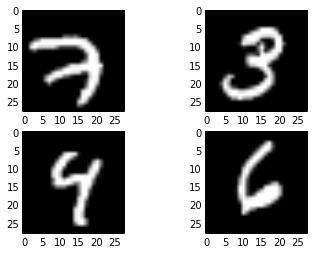

In [109]:
show_image(mnist.train.images[0:4])

**Creating the model**

Let's create the model

In [156]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

In [157]:
y_ = tf.placeholder(tf.float32, [None, 10])
# The raw formulation of cross-entropy,
  #
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
                                  reduction_indices=[1]))
  #
  # can be numerically unstable.
  #
  # So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
  # outputs of 'y', and then average across the batch.
# cross_entropy = tf.reduce_mean(
#       tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))


**Defining the optimizer**

Gradient descent with learning rate of 0.5

In [158]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

And let's start the training

In [164]:
tf.global_variables_initializer().run()
# Train
for _ in range(2000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

**Testing the model**

0.92


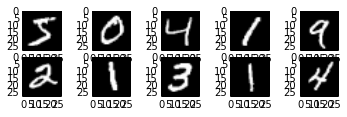

('Predicted: ', array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4]))
('Actual(Labelled): ', array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4]))


In [165]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                  y_: mnist.test.labels}))
show_image(mnist.validation.images[0:10])
print('Predicted: ', sess.run(tf.argmax(y, 1), {x: mnist.validation.images[0:10]}))
print('Actual(Labelled): ', sess.run(tf.argmax(mnist.validation.labels[0:10], 1)))

**How the model sees the pixel distribution**

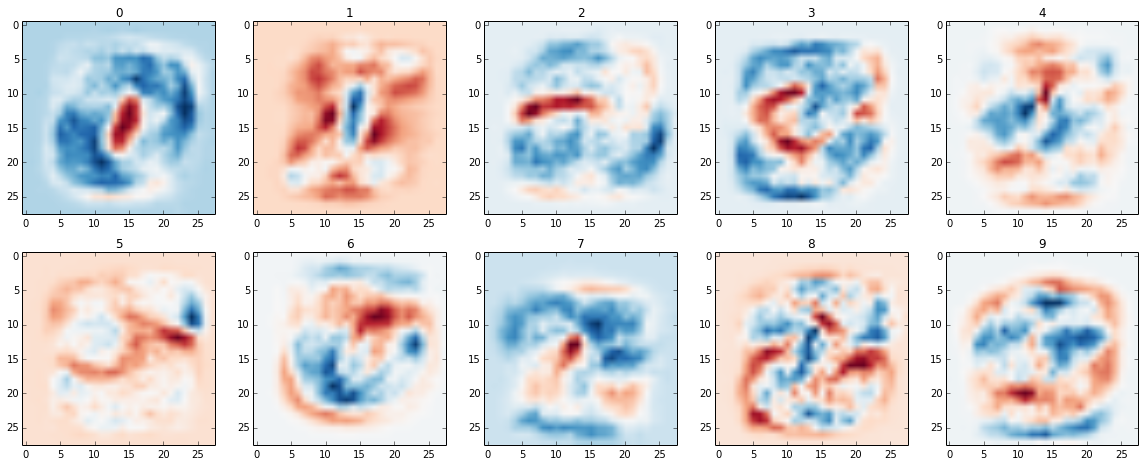

In [166]:
show_weights(sess.run(W))


## Let's try it with our own images

In [167]:
arr_images = [i for i in os.listdir('custom_data') if i.endswith(".jpg")][::-1]
print(arr_images)

['0.jpg', '1.jpg', '3.jpg', '2.jpg', '6.jpg', '7.jpg', '5.jpg', '4.jpg', '9.jpg', '8.jpg']


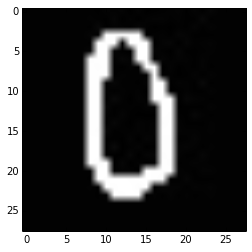

('Predicted: ', array([0]))


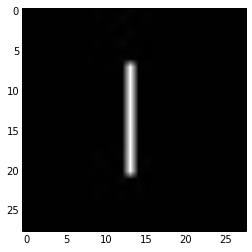

('Predicted: ', array([1]))


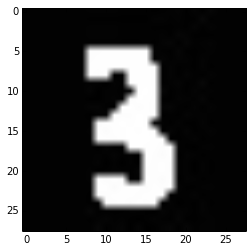

('Predicted: ', array([3]))


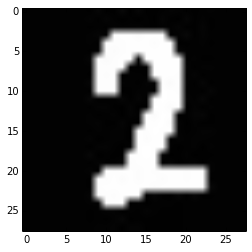

('Predicted: ', array([2]))


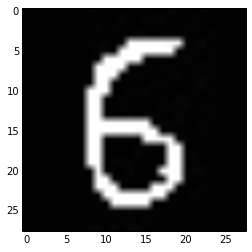

('Predicted: ', array([8]))


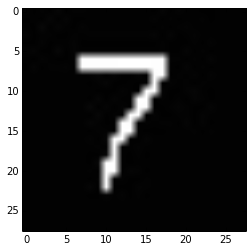

('Predicted: ', array([3]))


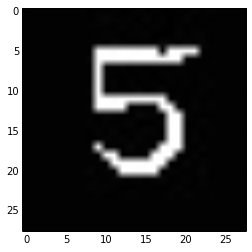

('Predicted: ', array([8]))


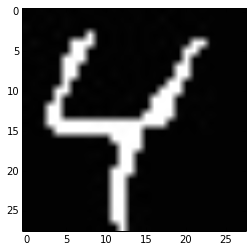

('Predicted: ', array([4]))


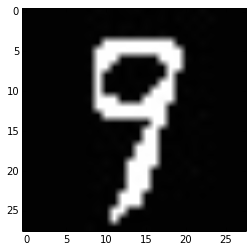

('Predicted: ', array([3]))


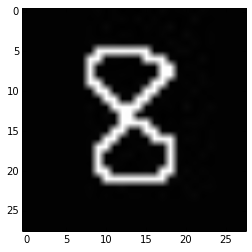

('Predicted: ', array([8]))


In [168]:
for image_path in arr_images:
    image = Image.open(os.path.join('custom_data', image_path)).convert('L')
    pixels = np.array(image).ravel()
    show_image([pixels])
    print('Predicted: ', sess.run(tf.argmax(y, 1), {x: [pixels]}))
    